<a href="https://colab.research.google.com/github/saks0106/ML_Frequent-Lookouts/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


#K-Means Clustering

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

In [ ]:
df = pd.read_csv('/content/technical_support_data-2.csv')
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df['PROBLEM_TYPE'].value_counts()

Temperature control not working              1
AC controller sofware missing                1
Battery does not last full 8 hrs             1
Battery backup does not get fully charged    1
WIFI connectivity breaks                     1
Factory settings not working                 1
Freshner holder stuck                        1
Motor noise from the system                  1
Unable to operate menu from remote           1
Remote Keys get stuck                        1
AC remote does not  work                     1
Cluttered with popup messages                1
power chord does not tightly fit             1
Mobile screen blanks on use of phone         1
Reinstalling the app hangs the phone         1
Unable to connect the App to the device      1
App takes a long time to initialize          1
App hangs while entring commands             1
AC stops abruptly                            1
Forgot mobile app password                   1
Main switch does not on                      1
Fan swing not

In [ ]:
df.shape

(23, 8)

In [ ]:
df2 = df.iloc[:,1:]
df2 = df2.apply(zscore)
df2.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


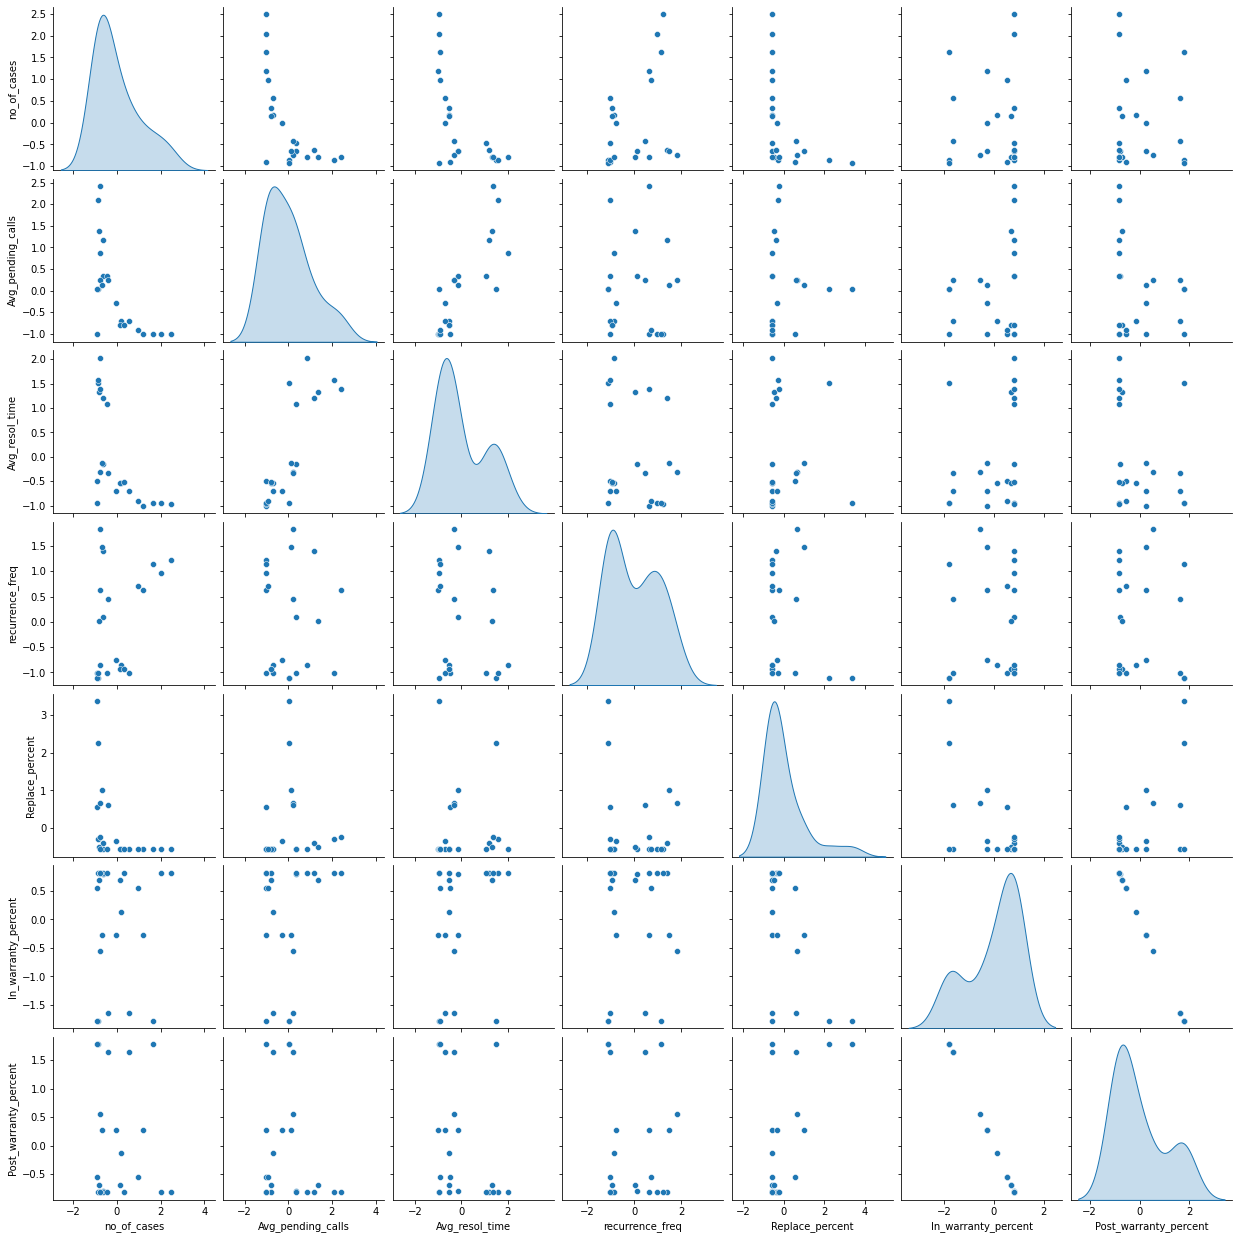

In [ ]:
sns.pairplot(df2, diag_kind='kde')

Group Data into similar clusters
Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

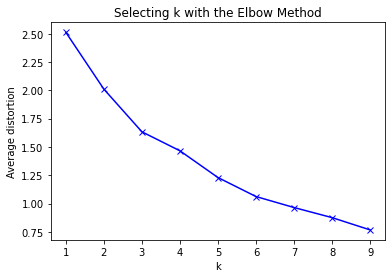

In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist #cdist will  compute dist between each pair of the 2 collections of inputs
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0]) 
      # summation of (x-xhat)**2/n
      # every point in df2 and cluster_centers


plt.plot(clusters, meanDistortions, 'bx-') #blue line with x marker with - line
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()
#OUR OBJECTIVE IS TO FIND WITHIN GROUP VARIANCE Which is MINIMUM, AFTER THE ELBOW POINT, VARIANCE IS NOT THAT SIGNIFICANT

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [ ]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df2)
prediction=final_model.predict(df2) # this will give clusters -> 0,1,2 

#Append the prediction 
df["GROUP"] = prediction
df2["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

In [ ]:
techSuppClust = df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,229.900000,1.280000,24.000000,0.128000,0.024000,86.900000,13.100000
1,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


In [ ]:
df[df['GROUP']==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,0
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,0
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,0
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,0
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,0
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,0
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,0
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,0
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,0


array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

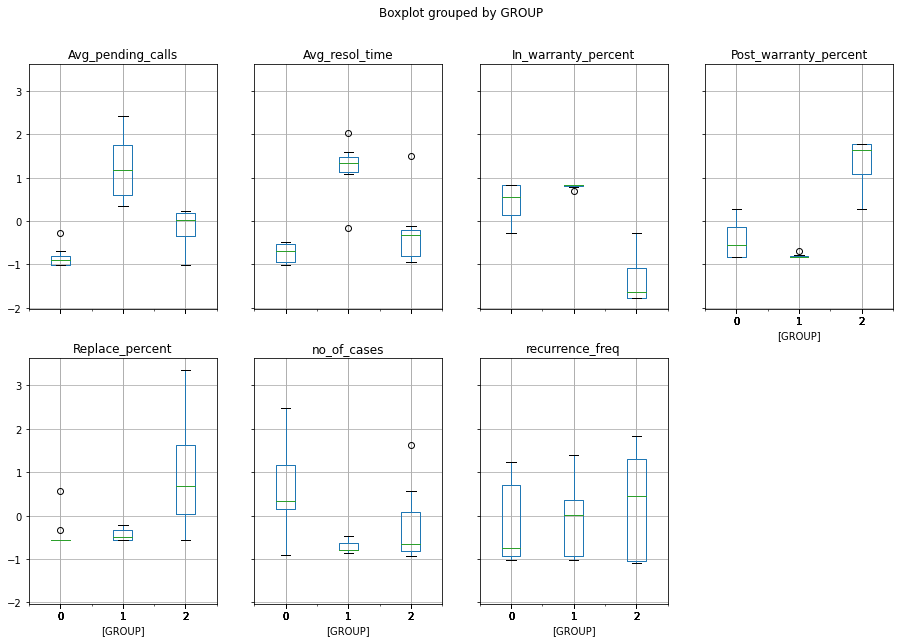

In [ ]:
df2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(df2)
prediction=final_model.predict(df2) # this will give clusters -> 0,1,2 

#Append the prediction 
df["GROUP"] = prediction
df2["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,3
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,3
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [ ]:
techSuppClust = df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
1,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
2,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000
3,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000
4,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000


array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

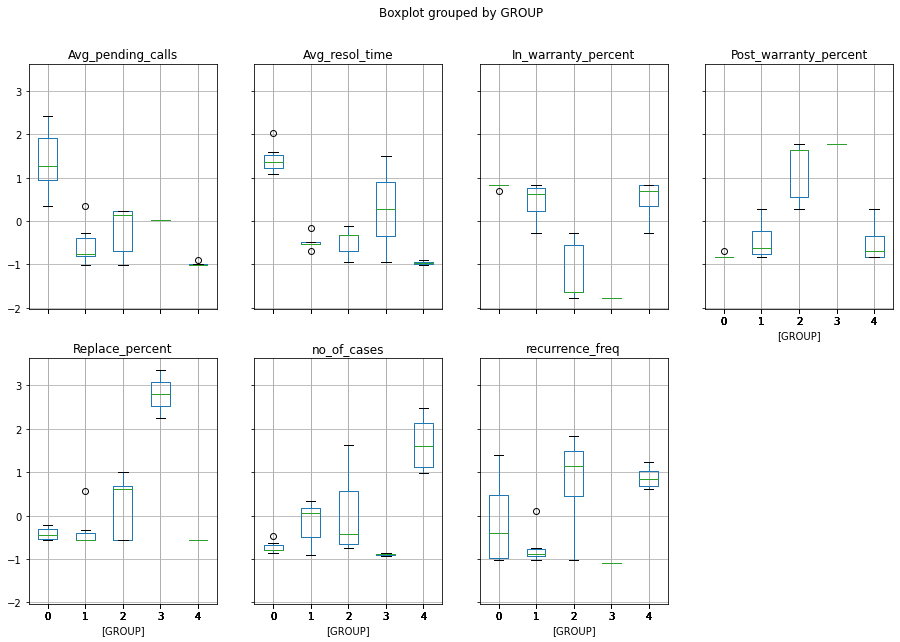

In [ ]:
df2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [ ]:
#k=3 looks better

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4, #how many centroids
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

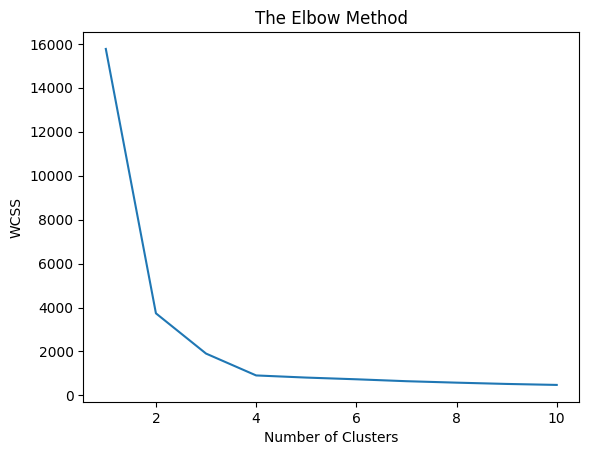

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # .inertia will give distance of centroids and every single point

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#The last abrupt change is at 4 , using silhouettte_score to verify if 4 is right value or not

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


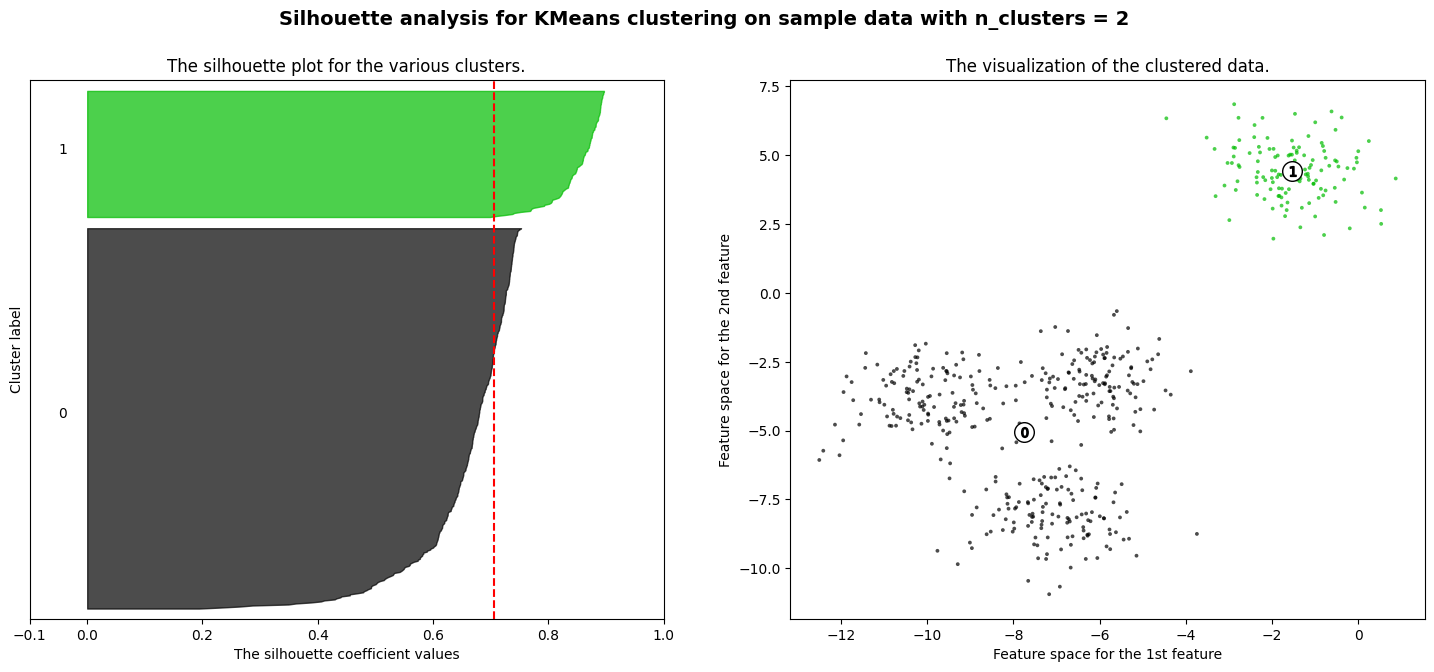

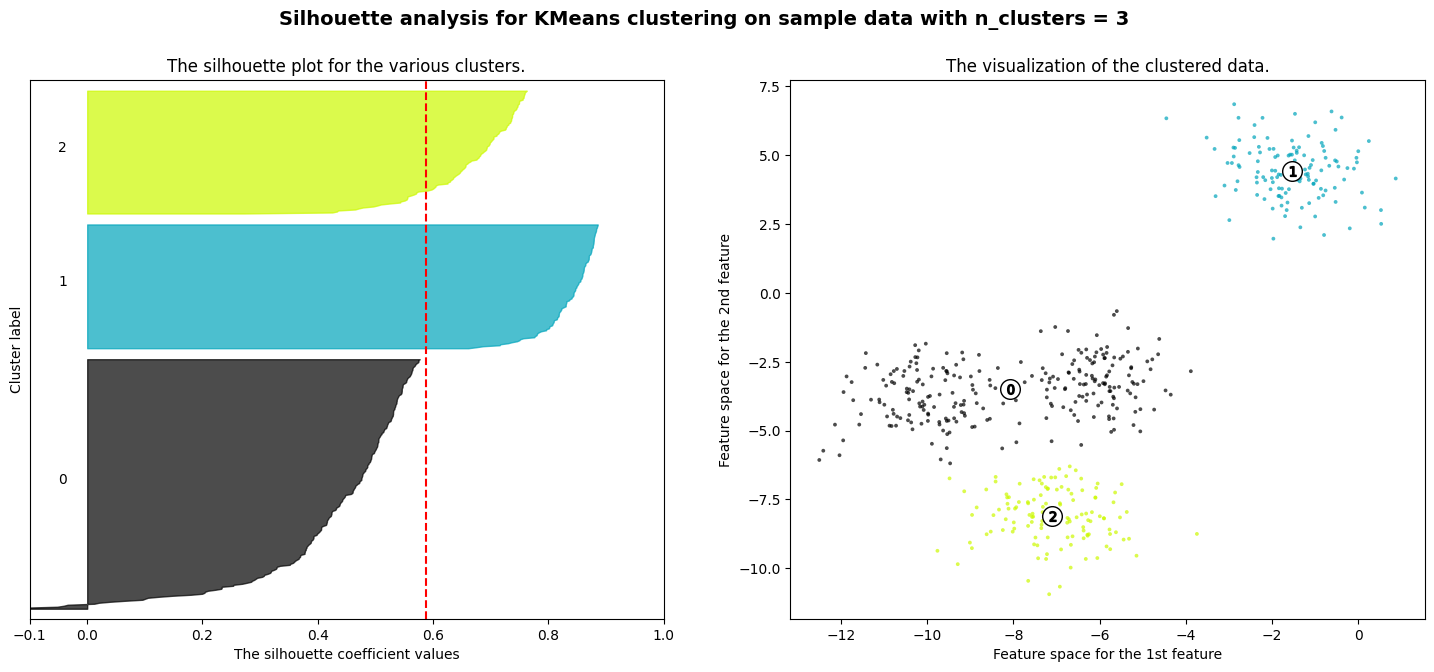

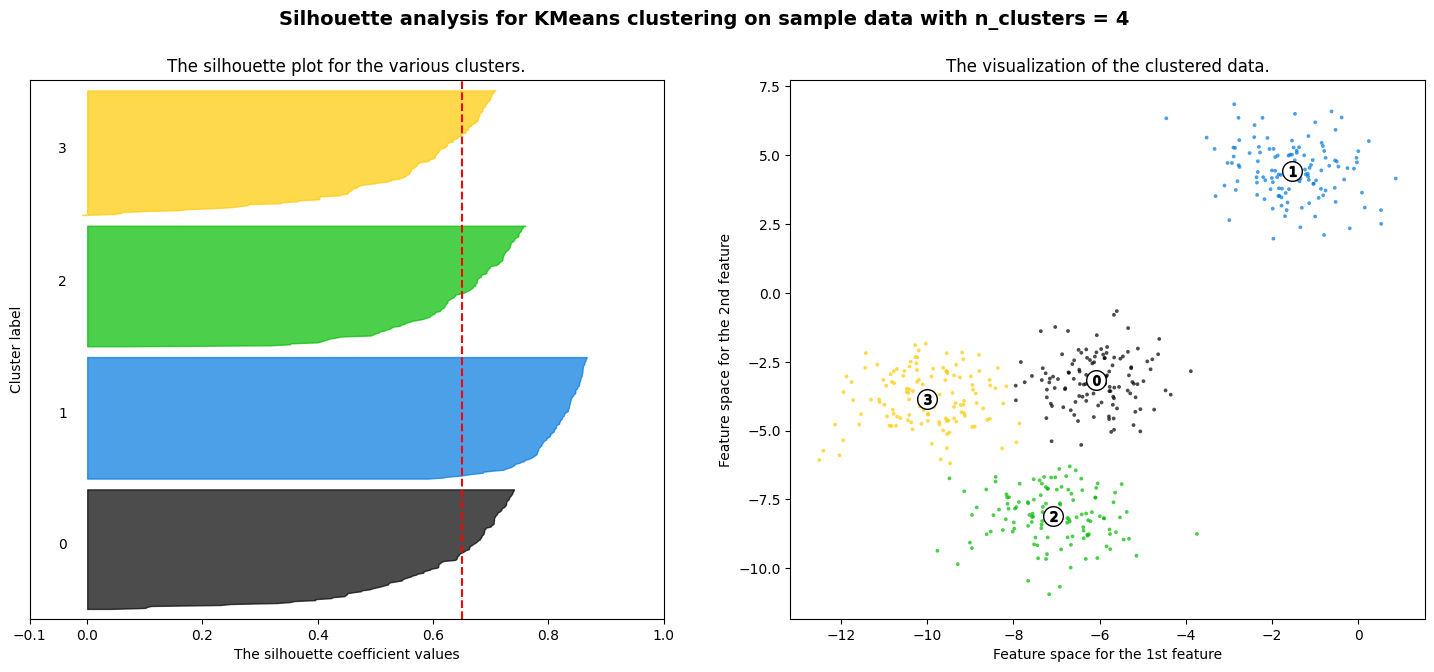

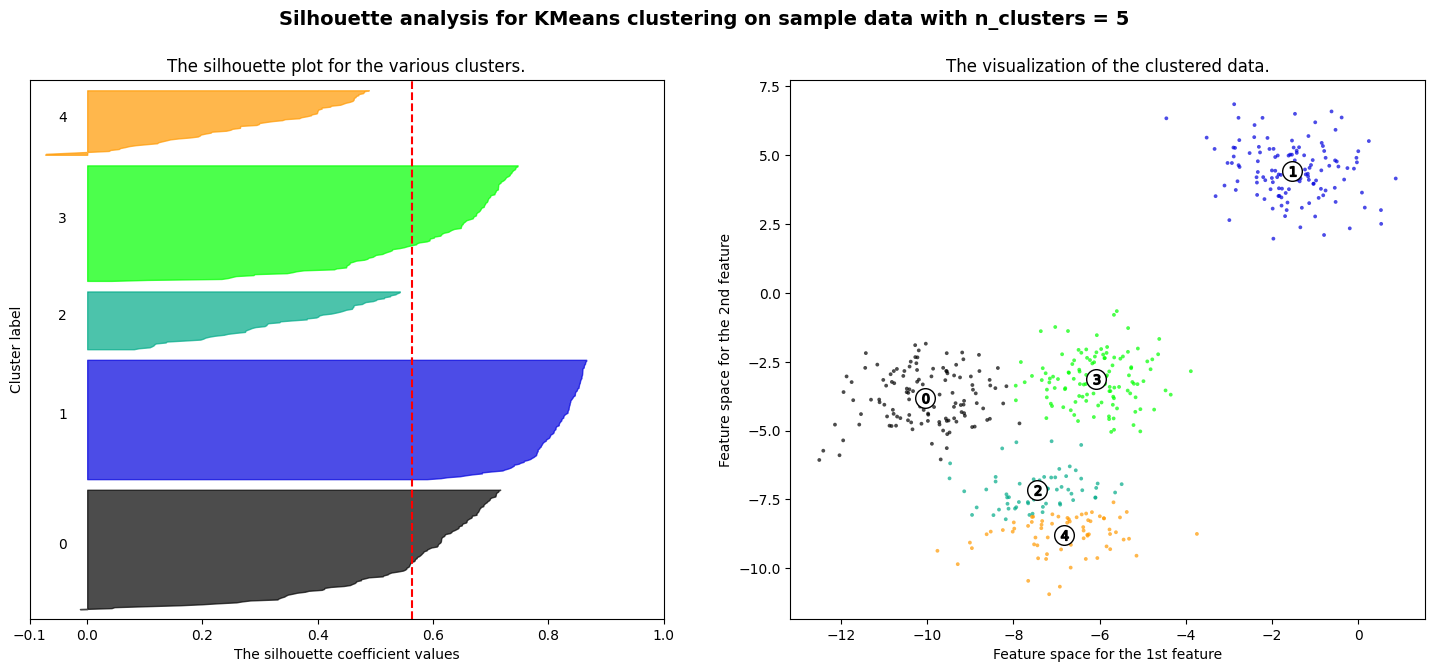

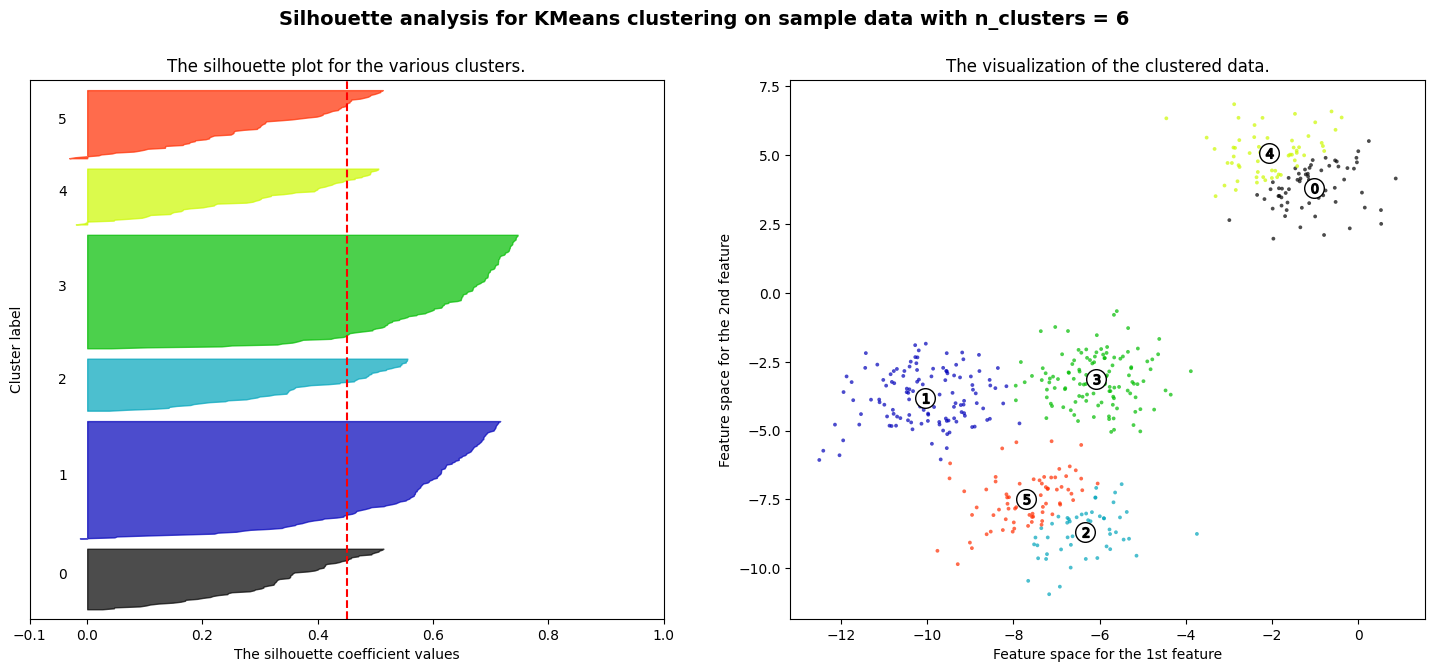

In [ ]:
#silhouette code from sklearn

range_n_clusters = [2, 3, 4, 5, 6] #this will be used to check that the n_cluster value we choose is correct or not using  silhouette_score
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels) #a(i), b(i) then score--> if value towards +1, better 
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    #below is to show data as graph
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Red dotted line is the score
#Above graph tells us that K=2 could be taken as left graph starts from 0
#K=3,5 not possible as last gray cluster is starting from -ve values
#K=4 also looks good
#So K=2,4. Always take a bigger no as it will be able to create a generalized model

#DBScan

Advantage - Great in seperating clusters of high density , great in handling outliers

Disadvantage - No good when dealing with cluters of varying densities and struggles with clusters of similar density. It struggles with high dims data ie too many dims

In [ ]:
# DBSCAN Clustering

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4) # eps is radius point, min_samples if min points for core

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_


from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool) 

sample_cores[dbscan.core_sample_indices_]=True # where ever sample_cores are  cluster make it -true

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0) # 9 clusters



print(metrics.silhouette_score(X,labels))
print("----")
print(labels) # -1 are outliers and do not fall in any of the clusters , 0-8 are clusters
print("----")
print(sample_cores) # -1 are no cluster but rest are

-0.1908319132560097
----
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  3
  3 -1  3 -1 -1  4 -1 -1 -1  4  5  4 -1  4  5 -1  5  4 -1  4  5 -1 -1  6
 -1 -1 -1  7 -1  6 -1  6 -1  7 -1  6 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  8 -1  8 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]
----
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  

#Hierarchial Clustering

In [ ]:
# reading the CSV file into pandas dataframe
custData = pd.read_csv("Cust_Spend_Data.csv") 
custData.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [ ]:
custDataAttr=custData.iloc[:,2:] #no need for customerid and name
custDataAttr.head()


,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [ ]:
custDataScaled=custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


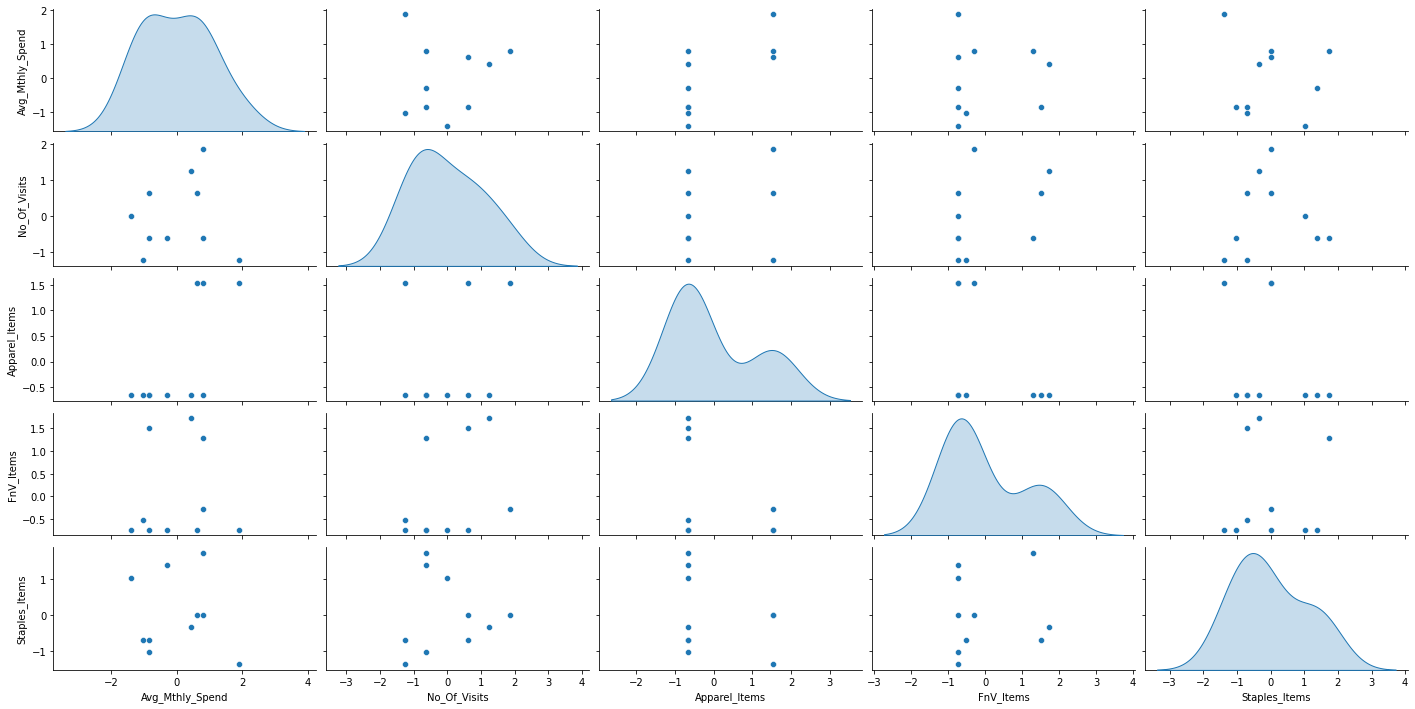

In [ ]:
#importing seaborn for statistical plots
sns.pairplot(custDataScaled, height=2,aspect=2 , diag_kind='kde')

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average') 
# n_cluster is from k means clustering
#linkage is connecting points between 2 clusters- see 1310
#euclidean works best


In [ ]:
model.fit(custDataScaled) # hyperparameter tuning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
custDataAttr['labels'] = model.labels_ # labels will have 0,1,2 clusters
custDataAttr.head(10)

#custDataAttr.groupby(["labels"]).count()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [ ]:
custDataClust = custDataAttr.groupby(['labels'])

In [ ]:
custDataClust.mean() #cluster 0 customer gives most profit

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [ ]:
custDataAttr[custDataAttr['labels']==0] #check for 1,2 and find customer buying pattern

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average') 
  # distance between 2 cluster is calculated as the average distance between all pairs of objects in 2 different cluster
c, coph_dists = cophenet(Z , pdist(custDataScaled)) 
  # c is cophenet corr ie corr between Z and pairwise dist (euclidean and dendogram dist corr)

c

0.8681149436293064

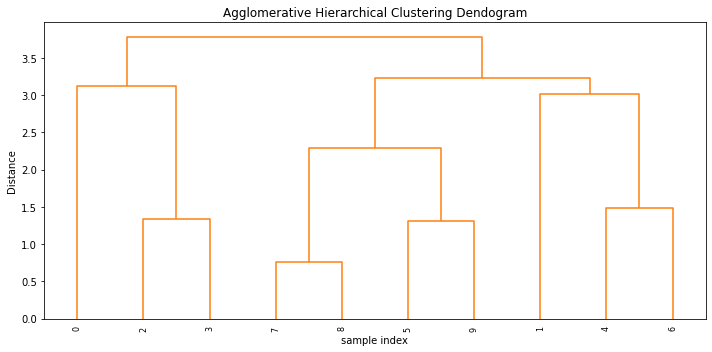

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram') 
# Agglomerative start on individual cluster to 1 big cluster and opposite is divisive cluster ie 1 big cluster to small clusters
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='complete') #SS290 - complete link
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8606955190809153

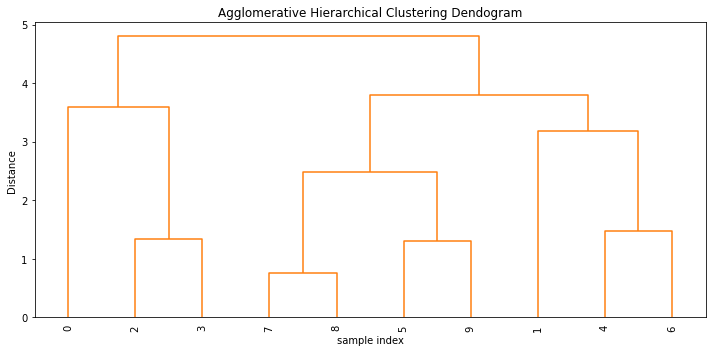

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward') 
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.8453818941339526

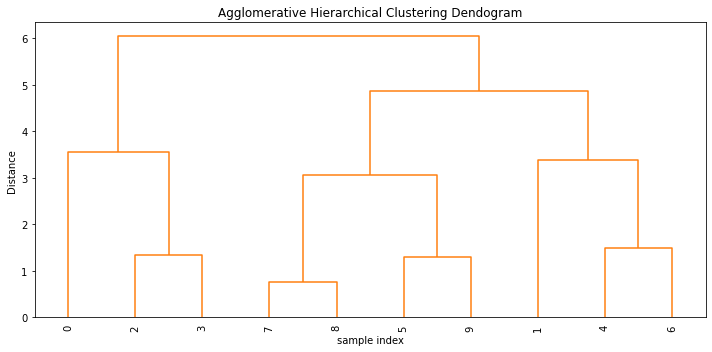

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

#PCA

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another.

When should I use PCA?
- Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
- Do you want to ensure your variables are independent of one another?
- Are you comfortable making your independent variables less interpretable?

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(bc['data'], columns=bc['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.shape

(569, 30)

In [ ]:
#Standardzation
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() #mean -0 and Std-1 , xi-u/sigma

In [ ]:
scaler.fit(df) # 1st fit

StandardScaler()

In [ ]:
 scaled_df = scaler.transform(df) # data between -3 to +3, now transform
 scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#fit_transform
df2 = scaler.fit_transform(df)
df2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#Apply PCA Algorithm
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) # n_components = 2 means all the feature ie 30D --> 2D


In [ ]:
pca_df = pca.fit_transform(scaled_df)
pca_df


array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
pca.explained_variance_ # max variacne captured in PC1 and 2nd best in PC2

array([13.30499079,  5.7013746 ])

In [ ]:
#concat y and then apply supervised ML

In [ ]:
pca30 = PCA() # 30D--> 30D
pca_df30 = pca30.fit_transform(scaled_df)
pca_df30


array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [ ]:
pca30.explained_variance_ # for every feature, its variance

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

Text(0, 0.5, '2nd PCA')

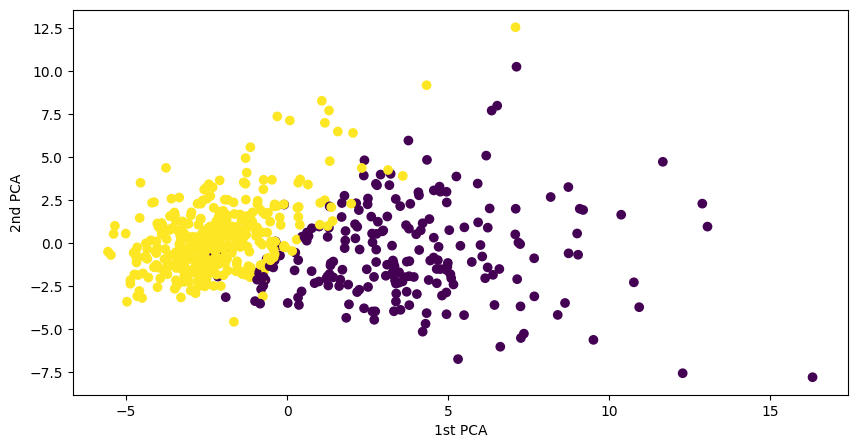

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_df[:,0], pca_df[:,1],c=bc['target'])
plt.xlabel('1st PCA')
plt.ylabel('2nd PCA')